In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #importing the needed libraries

In [2]:
df=pd.read_csv("C:/Users/Furkan/Desktop/politik.csv",encoding = "ISO-8859-1")  #adding the dataset
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,8/4/15 21:17,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,False,finalized,1,8/4/15 21:20,national,1.0,partisan,1.0,attack,...,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,False,finalized,1,8/4/15 21:14,national,1.0,neutral,1.0,support,...,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
3,766192487,False,finalized,1,8/4/15 21:08,national,1.0,neutral,1.0,policy,...,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,False,finalized,1,8/4/15 21:26,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,766197482,False,finalized,1,8/5/15 6:05,national,1.0,partisan,1.0,support,...,NaN,NaN,NaN,Y000065,"<div id=""fb-root""></div> <script>(function(d, ...",563532937006022_939071892785456,From: Ted Yoho (Representative from Florida),NaN,facebook,I applaud Governor PerryÛªs recent decision t...
4996,766197483,False,finalized,1,8/5/15 5:57,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,Y000065,"<div id=""fb-root""></div> <script>(function(d, ...",563532937006022_936080056417973,From: Ted Yoho (Representative from Florida),NaN,facebook,"Today, I voted in favor of H.R. 5016 - Financi..."
4997,766197484,False,finalized,1,8/5/15 5:10,national,1.0,neutral,1.0,policy,...,NaN,NaN,NaN,Y000065,"<div id=""fb-root""></div> <script>(function(d, ...",563532937006022_905547326137913,From: Ted Yoho (Representative from Florida),NaN,facebook,(Taken from posted WOKV interview) Congressm...
4998,766197485,False,finalized,1,8/5/15 6:08,national,1.0,neutral,1.0,media,...,NaN,NaN,NaN,Y000065,"<div id=""fb-root""></div> <script>(function(d, ...",563532937006022_10101529848812566,From: Ted Yoho (Representative from Florida),NaN,facebook,Join me next week for a town hall in Ocala! I'...


In [3]:
null_columns=df.columns[df.isnull().any()]   #checking for nullvalues
df.isnull().sum()

_unit_id                  0
_golden                   0
_unit_state               0
_trusted_judgments        0
_last_judgment_at         0
audience                  0
audience:confidence       0
bias                      0
bias:confidence           0
message                   0
message:confidence        0
orig__golden           5000
audience_gold          5000
bias_gold              5000
bioid                     0
embed                     0
id                        0
label                     0
message_gold           5000
source                    0
text                      0
dtype: int64

In [4]:
df = df.drop(['bias','audience','label','source','message:confidence','orig__golden','audience_gold','bias_gold','message_gold','_unit_id','_golden','_unit_state','_last_judgment_at','bioid','id','_trusted_judgments','embed','audience:confidence','bias:confidence'],axis=1)
df   #cleaning up the data

,message,text
0,policy,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,attack,VIDEO - #Obamacare: Full of Higher Costs and ...
2,support,Please join me today in remembering our fallen...
3,policy,RT @SenatorLeahy: 1st step toward Senate debat...
4,policy,.@amazon delivery #drones show need to update ...
...,...,...
4995,support,I applaud Governor PerryÛªs recent decision t...
4996,policy,"Today, I voted in favor of H.R. 5016 - Financi..."
4997,policy,(Taken from posted WOKV interview) Congressm...
4998,media,Join me next week for a town hall in Ocala! I'...


In [5]:
df.describe()  #describe function is used to get a descriptive statistics summary of a given dataframe.

,message,text
count,5000,5000
unique,9,5000
top,policy,"Today, we look back -- remembering the horror,..."
freq,1411,1


In [6]:
print(df['message'].unique())  #it returns to the sorted unique elements of message column.

['policy' 'attack' 'support' 'information' 'mobilization' 'personal'
 'other' 'constituency' 'media']


In [8]:
df.loc[((df.message=='personal') | (df.message=='media') | (df.message=='other')),'message']='Not Politic'
df.loc[((df.message=='attack') | (df.message=='mobilization') | (df.message=='policy') | (df.message=='support') | (df.message=='constituency') | (df.message=='information')),'message']='Politic'
#with loc function we can access the columns.
#if the messages type is personal or media or other,than it is not politic.
#if the message type is attack or mobilization or policy or support or constituency or information,than it is politic.

In [9]:
df.head() #head() function returns to the first 5 rows of dataframe.

,message,text
0,Politic,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,Politic,VIDEO - #Obamacare: Full of Higher Costs and ...
2,Politic,Please join me today in remembering our fallen...
3,Politic,RT @SenatorLeahy: 1st step toward Senate debat...
4,Politic,.@amazon delivery #drones show need to update ...


In [10]:
from io import StringIO
df['message_id'] = df['message'].factorize()[0]   #we used factorize function for obtaining numeric representation.
message_id_df = df[['message', 'message_id']].drop_duplicates().sort_values('message_id')
message_to_id = dict(message_id_df.values)
id_to_message = dict(message_id_df[['message_id', 'message']].values)
df.head()

,message,text,message_id
0,Politic,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...,0
1,Politic,VIDEO - #Obamacare: Full of Higher Costs and ...,0
2,Politic,Please join me today in remembering our fallen...,0
3,Politic,RT @SenatorLeahy: 1st step toward Senate debat...,0
4,Politic,.@amazon delivery #drones show need to update ...,0


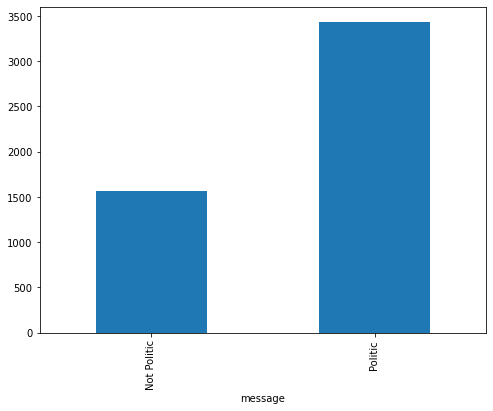

In [11]:
fig = plt.figure(figsize=(8,6))   #we used barplot-bar chart for comparing the politic and non-politic messages.
df.groupby('message').text.count().plot.bar(ylim=0)
plt.show()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer  #we wrote this line for calculating the term frequency,inverse document frequency
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.text).toarray()
labels = df.message_id
features.shape
#sublinear_tf=True because of using logarithmic form for frequency
#ngram_range=(1,2) because we wat to consider unigrams and bigrams
#stop_words is english because we want to reduce the number of noisy features and remove the pronouns.

(5000, 3838)

In [13]:
from sklearn.feature_selection import chi2

N = 2
for message, message_id in sorted(message_to_id.items()):
  features_chi2 = chi2(features, labels == message_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(message))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
#in this part we are looking for the most correlated unigrams and bigrams for non politic and politic messages.

# 'Not Politic':
  . Most correlated unigrams:
. tune
. happy
  . Most correlated bigrams:
. tune http
. thanks having
# 'Politic':
  . Most correlated unigrams:
. tune
. happy
  . Most correlated bigrams:
. tune http
. thanks having


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['message'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

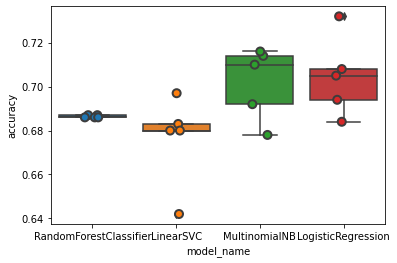

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()
#we used Logistic Regression,random forest ,linearSupportVectorMachine,Naive Bayes for evaluating the accuracy.

In [18]:
cv_df.groupby('model_name').accuracy.mean() #we grouped mean of accuracy for each machine learning models.

model_name
LinearSVC                 0.6764
LogisticRegression        0.7046
MultinomialNB             0.7020
RandomForestClassifier    0.6864
Name: accuracy, dtype: float64

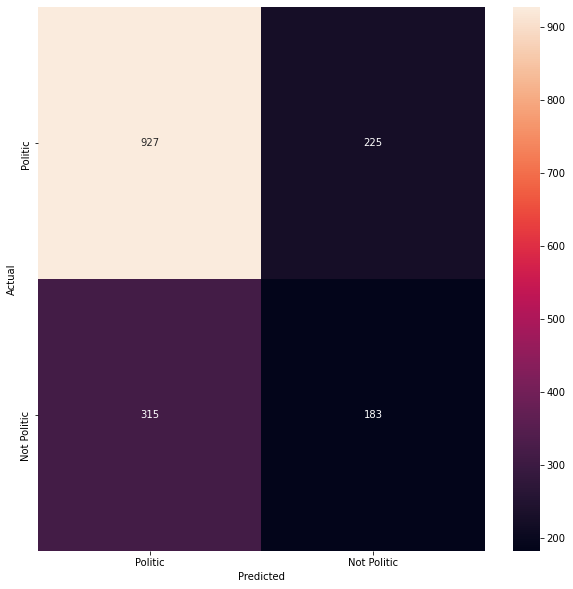

In [19]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=message_id_df.message.values, yticklabels=message_id_df.message.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
#we choosed LinearSVC and used confusion matrix.

In [20]:
from IPython.display import display
for predicted in message_id_df.message_id:
  for actual in message_id_df.message_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_message[actual], id_to_message[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['message', 'text']])
      print('')
    #we looked for misclassifications and what are them caused by.

'Not Politic' predicted as 'Politic' : 315 examples.


,message,text
4572,Not Politic,Congratulations to Eric Liu for his nomination...
636,Not Politic,"Hey, #MD02 ! Need help? My office is coming to..."
1161,Not Politic,"Sorry, @inspectorlawyer, death threats don't s..."
483,Not Politic,@KuhlsLBI @makuhls Great being with you and yo...
1778,Not Politic,Today Sen. Murray met w/ a #Kennewick woman se...
...,...,...
2343,Not Politic,No problem @joshmesker
118,Not Politic,"Looking for Job? Help me, help residents looki..."
3984,Not Politic,Retweeted RepKevinBrady (@RepKevinBrady): CIA...
2584,Not Politic,How many of you will be following this today? ...



'Politic' predicted as 'Not Politic' : 225 examples.


,message,text
398,Politic,Great to visit @Kmart Pharmacy in @Mentor_Ohio...
148,Politic,#RyanBudget hurts everyone in this country. Wh...
2466,Politic,And when I think about all of you who donated ...
4258,Politic,"I will be in western Kentucky TOMORROW, MONDAY..."
3711,Politic,"Robert Moffit, Ph.D., Senior Fellow at The Her..."
...,...,...
934,Politic,Looking forward to visiting @BWDistilling to a...
133,Politic,I'll continue working for strong bipartisan co...
598,Politic,RT @RepJimMcDermott: If only the #GOP were as ...
2265,Politic,Looking forward to a discussion on the #ACA wi...


In [25]:
from sklearn import metrics  #Lastly we printed the classification report.
print(metrics.classification_report(y_test, y_pred, target_names=df['message'].unique()))

              precision    recall  f1-score   support

     Politic       0.75      0.80      0.77      1152
 Not Politic       0.45      0.37      0.40       498

    accuracy                           0.67      1650
   macro avg       0.60      0.59      0.59      1650
weighted avg       0.66      0.67      0.66      1650

